In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot


In [5]:
output = load('hists_ttcom_dummy_sample.coffea')

btagCMVA btagCSVV2


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


btagDeepB btagDeepC


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


btagDeepFlavB btagDeepFlavC


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_0 DeepCSV_trackDecayLenVal_1


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_2 DeepCSV_trackDecayLenVal_3


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_4 DeepCSV_trackDecayLenVal_5


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDeltaR_0 DeepCSV_trackDeltaR_1
DeepCSV_trackDeltaR_2 DeepCSV_trackDeltaR_3
DeepCSV_trackDeltaR_4 DeepCSV_trackDeltaR_5
njet nbjet_t
nbjet_m nbjet_l
nel nmu
lelpt lmupt
ljpt sljpt


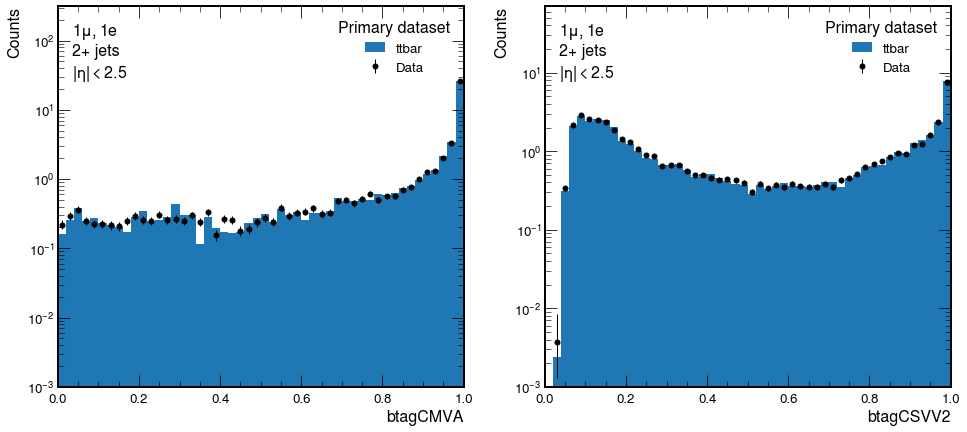

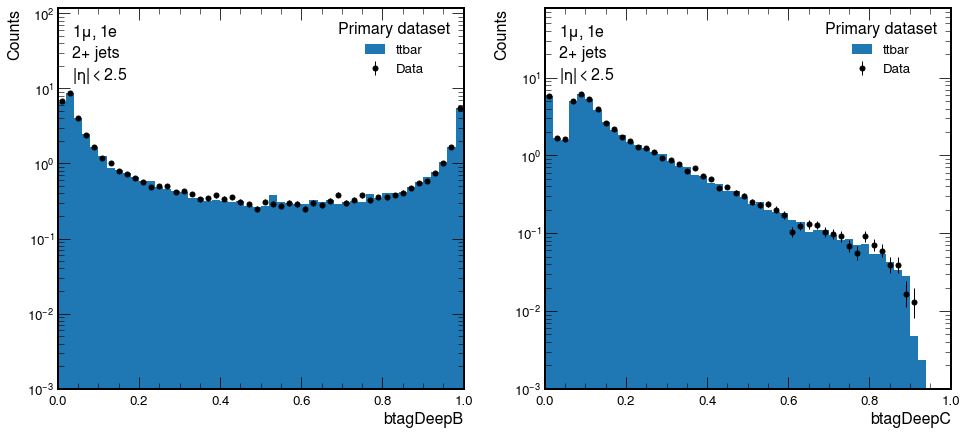

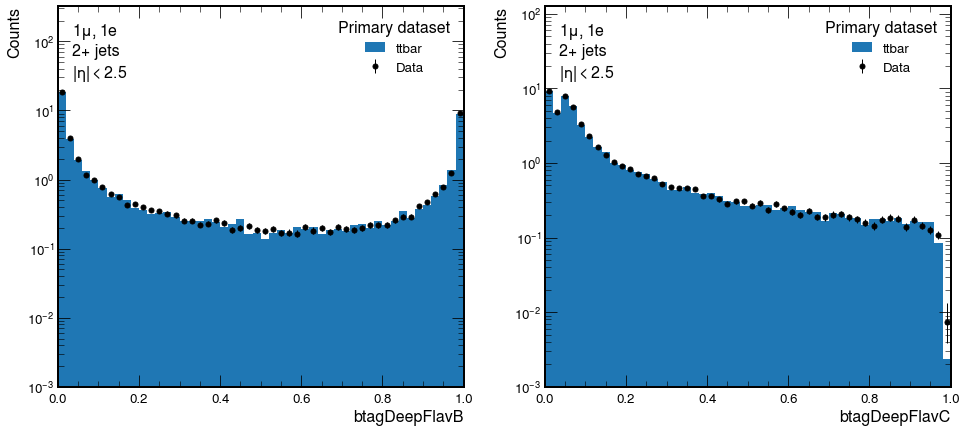

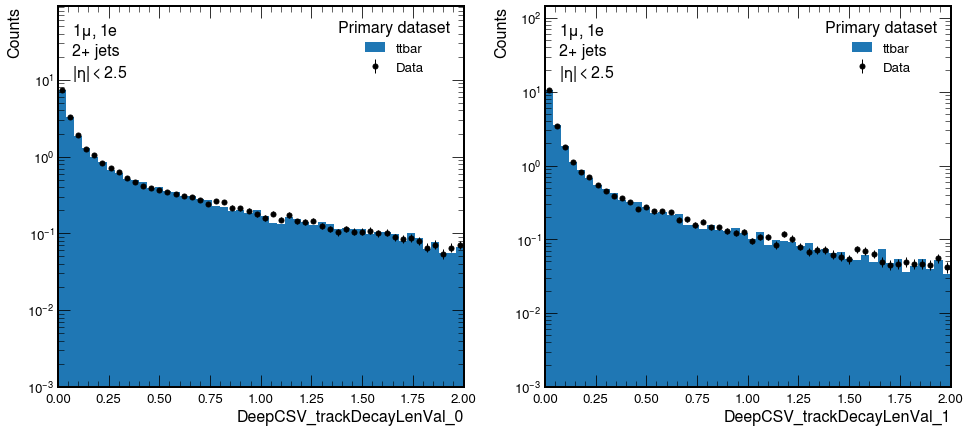

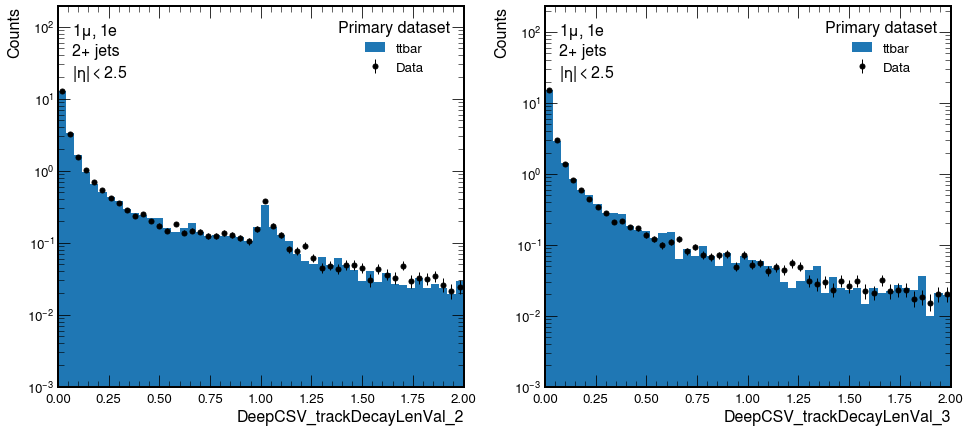

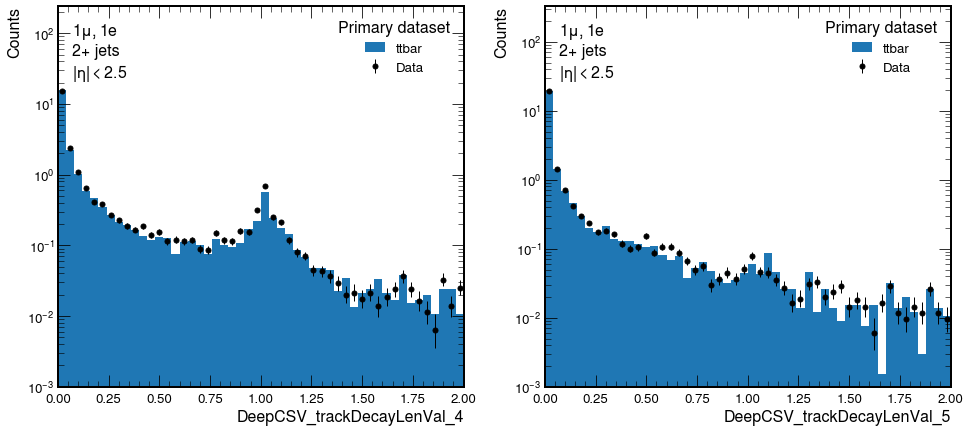

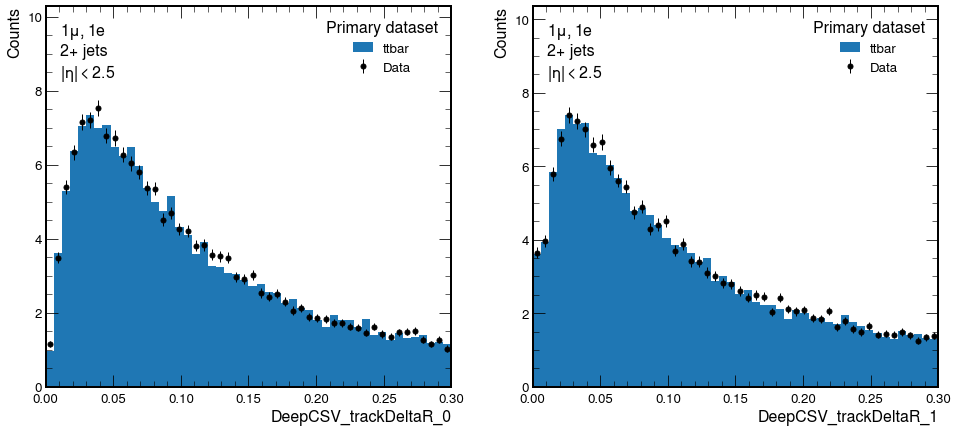

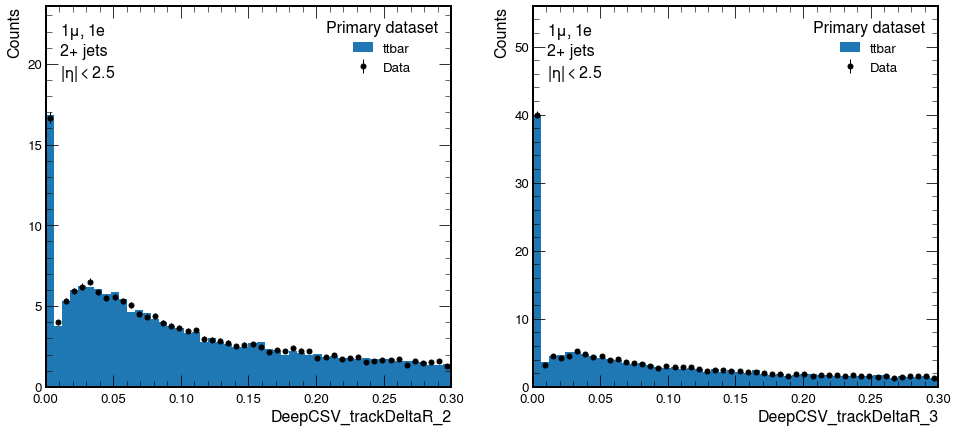

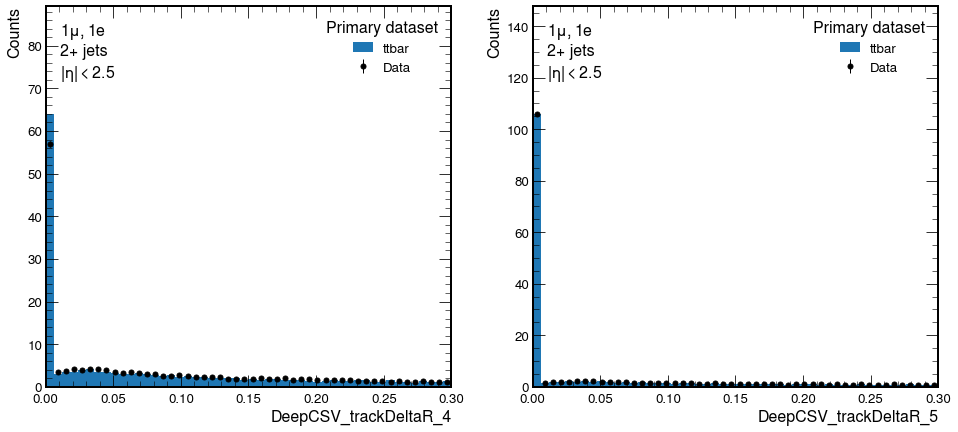

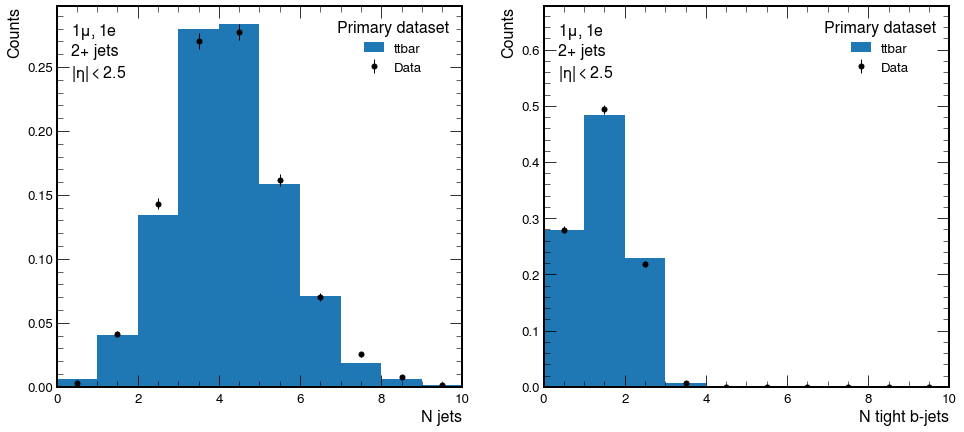

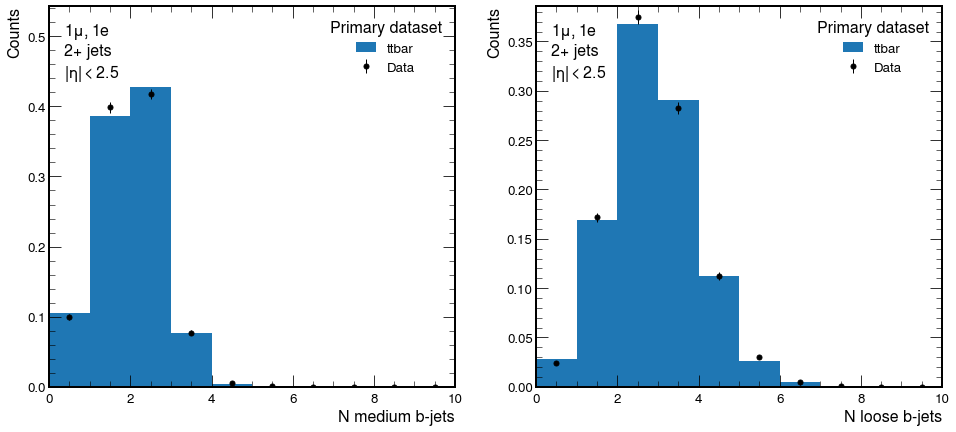

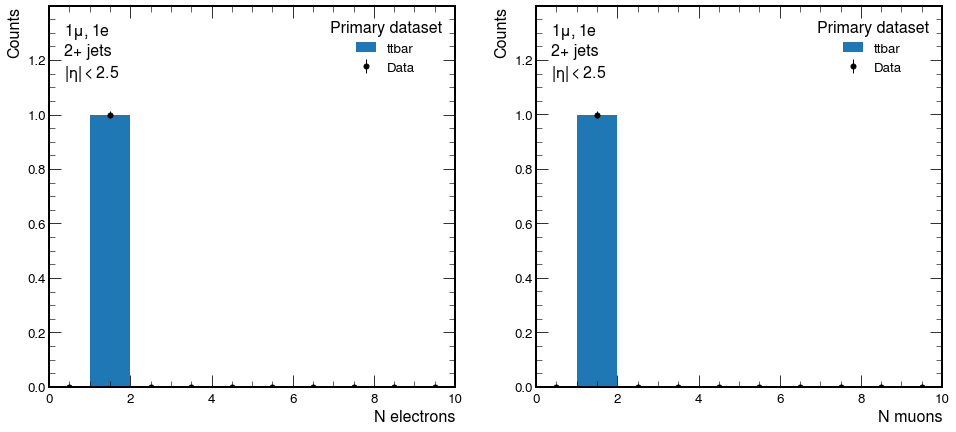

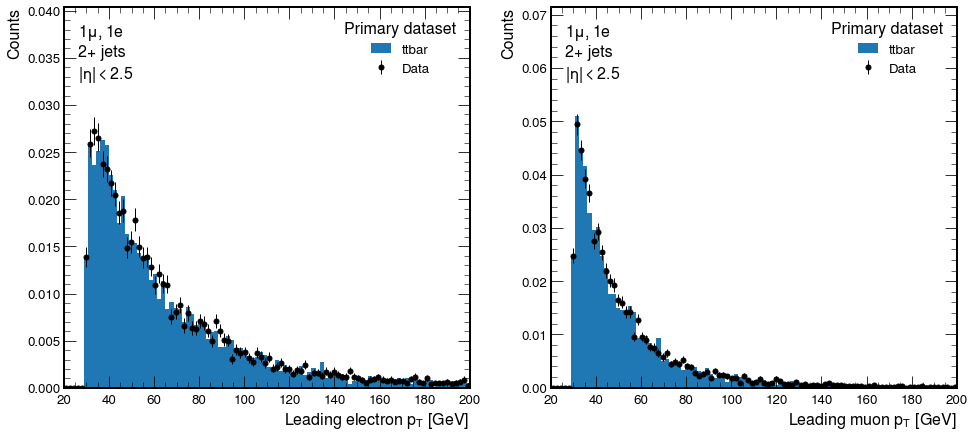

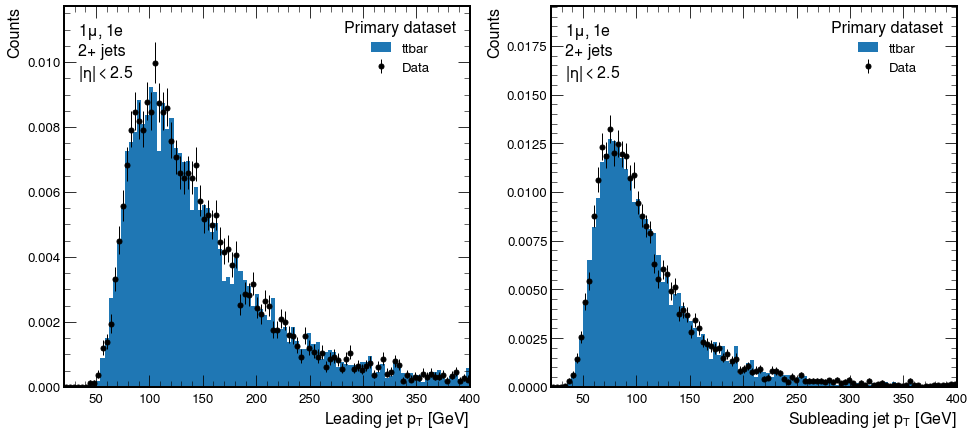

In [6]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharex=True)
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    print(h1name, h2name)
    h1 = output[h1name]
    h2 = output[h2name]
    # if True: normalize histo to 1
    dense = True
    
    for ax, h in zip([ax1, ax2], [h1, h2]):
        # scale MC samples according to lumi (for now, dummy scale)
        scales = {
            'ttbar': 1.0,
        }
        h.scale(scales,axis='dataset')
        if hasattr(h, 'dim'):
            plot.plot1d(h["ttbar"], ax=ax, legend_opts={'loc':1}, density=dense, stack=True);
            plot.plot1d(h["Data"], ax=ax, legend_opts={'loc':1}, density=dense, error_opts=data_err_opts, clear=False);
        else:
            continue    
        #break
    for ax, hname in zip([ax1, ax2], [h1name, h2name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        if hname.startswith("btag") or hname.startswith("DeepCSV_trackDecayLenVal"):
            ax.semilogy()
        ax.set_ylim(0.001, None)
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)

DeepCSV_trackDeltaR_0
DeepCSV_trackDeltaR_1


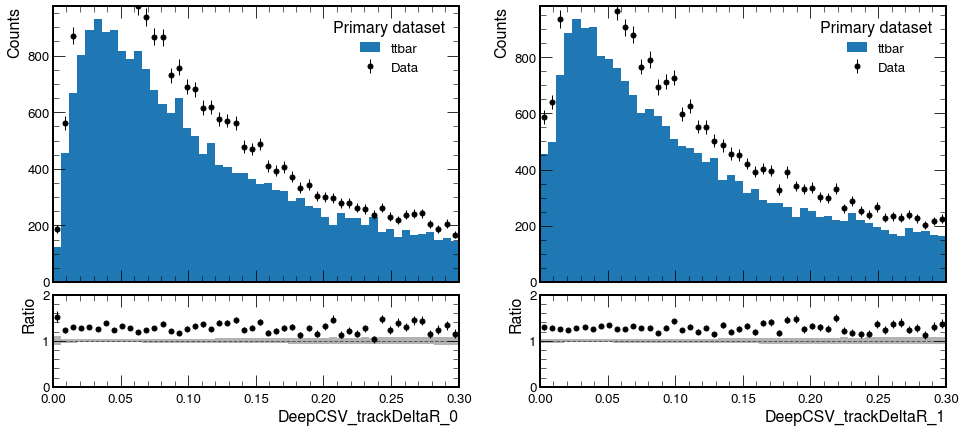

In [7]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

fig, ((ax1, ax2),(rax1, rax2)) = plt.subplots(2, 2, figsize=(16, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
h1name = list(output.keys())[16]
print(h1name)
h1 = output[h1name]
h2name = list(output.keys())[17]
print(h2name)
h2 = output[h2name]
fig.subplots_adjust(hspace=.07)

# if True: normalize histo to 1
dense = False
# scale MC samples according to lumi (for now, dummy scale)
scales = {
    'ttbar': 1.0,
}
h1.scale(scales,axis='dataset')
h2.scale(scales,axis='dataset')
for ax, rax, h in zip([ax1, ax2], [rax1, rax2], [h1, h2]):
    plot.plot1d(h["ttbar"], overlay="dataset", ax=ax, legend_opts={'loc':1}, density=dense, stack=True);
    plot.plot1d(h["Data"], overlay="dataset", ax=ax, legend_opts={'loc':1}, density=dense, error_opts=data_err_opts, clear=False);  
    # now we build the ratio plot
    plot.plotratio(
        num=h['Data'].sum("dataset"),
        denom=h['ttbar'].sum("dataset"),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num'
    )
    rax.set_ylabel('Ratio')
    rax.set_ylim(0,2)
    ax.set_xlabel(None)

#ax.semilogy()
#ax.set_ylim(0.001,None)

#hep.mpl_magic(ax)


    




btagCMVA btagCSVV2


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


btagDeepB btagDeepC


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


btagDeepFlavB btagDeepFlavC


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_0 DeepCSV_trackDecayLenVal_1


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_2 DeepCSV_trackDecayLenVal_3


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDecayLenVal_4 DeepCSV_trackDecayLenVal_5


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:691: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


DeepCSV_trackDeltaR_0 DeepCSV_trackDeltaR_1
DeepCSV_trackDeltaR_2 DeepCSV_trackDeltaR_3
DeepCSV_trackDeltaR_4 DeepCSV_trackDeltaR_5
njet nbjet_t


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: divide by zero encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:39: RuntimeWarning: invalid v

nbjet_m nbjet_l


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: divide by zero encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:39: RuntimeWarning: invalid v

nel nmu


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountere

lelpt lmupt


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encounter

ljpt sljpt


/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/work/m/mullerd/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encounter

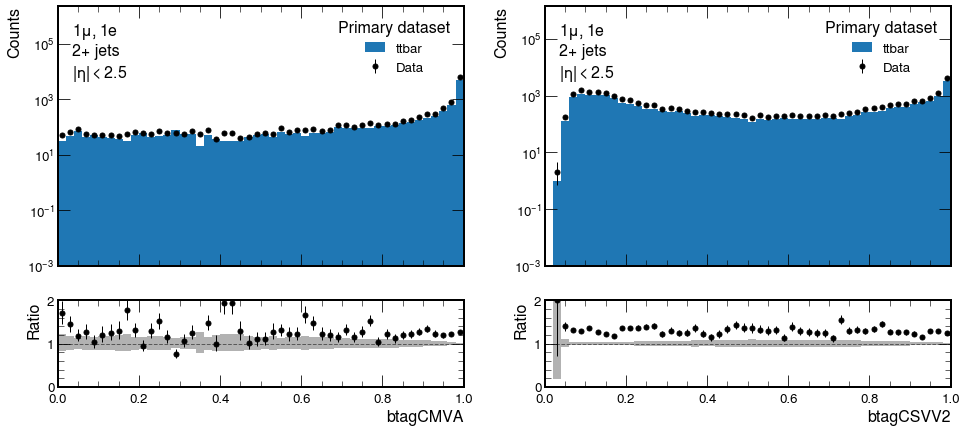

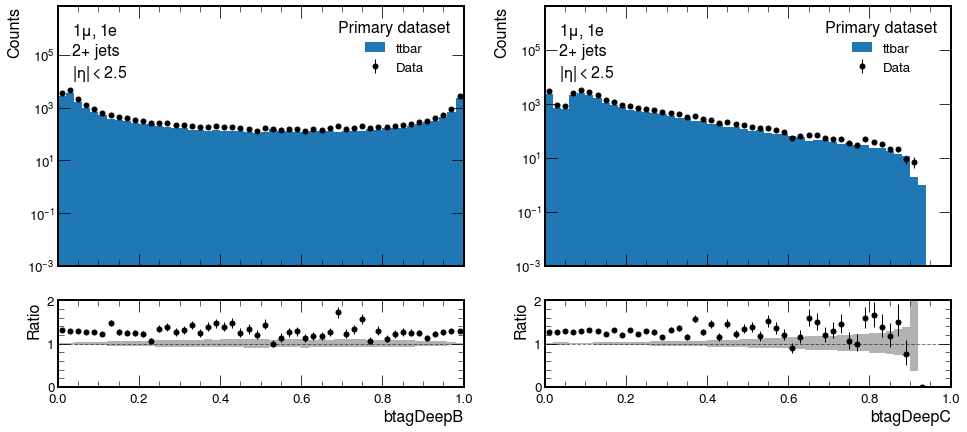

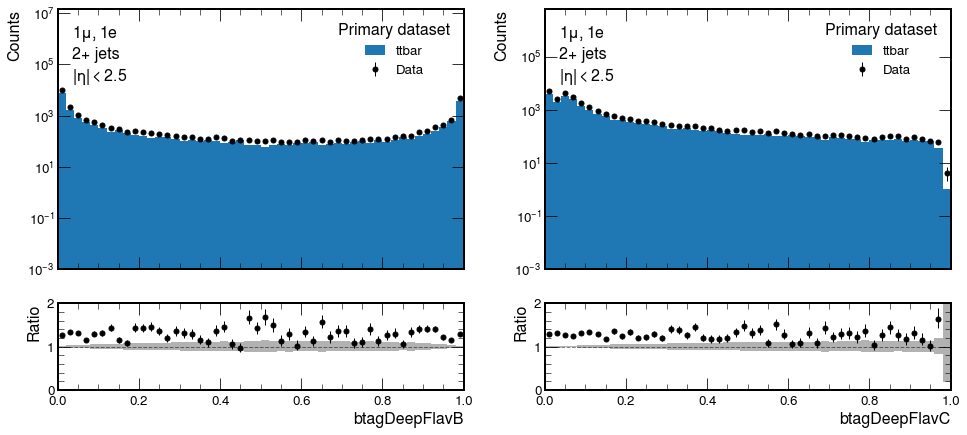

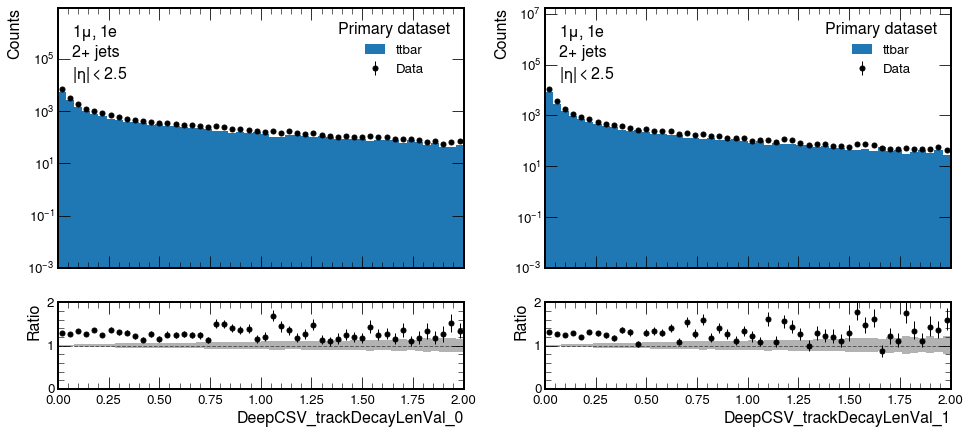

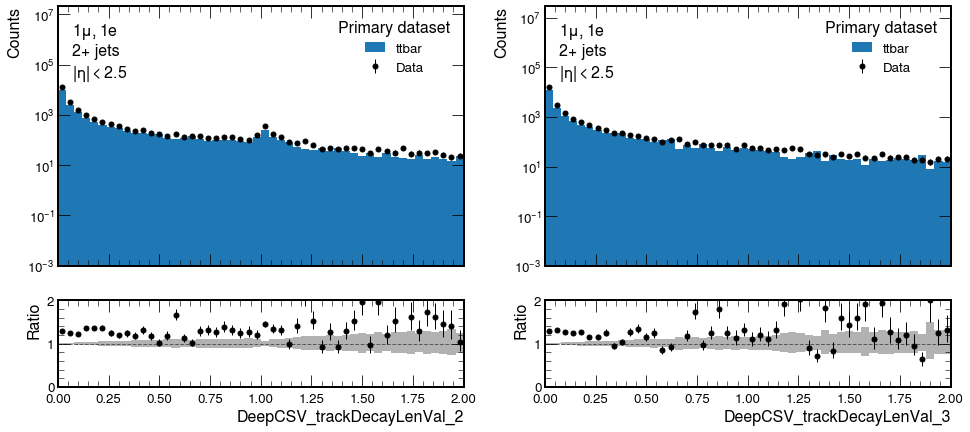

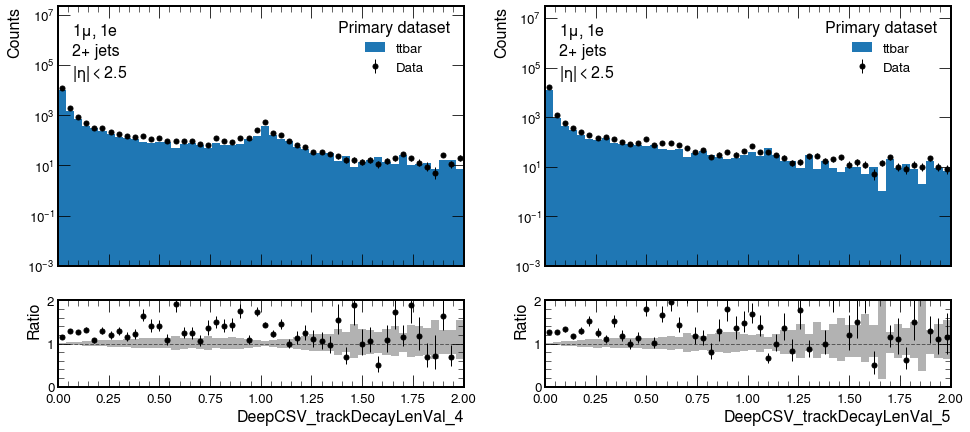

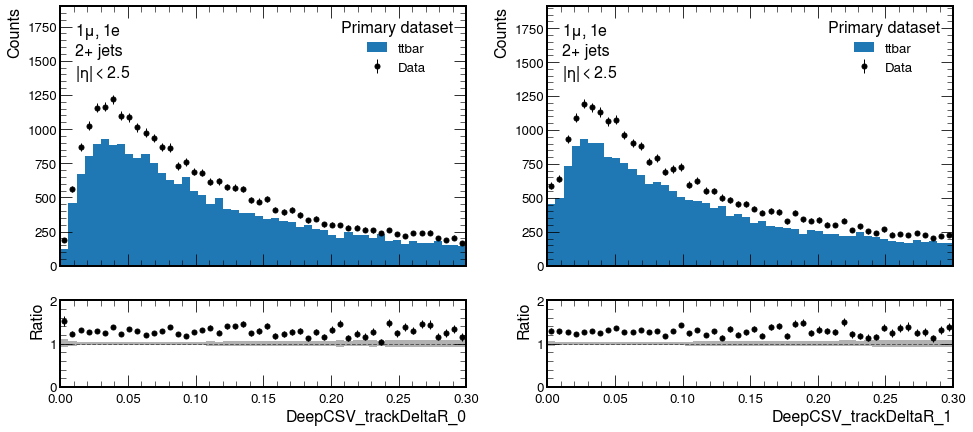

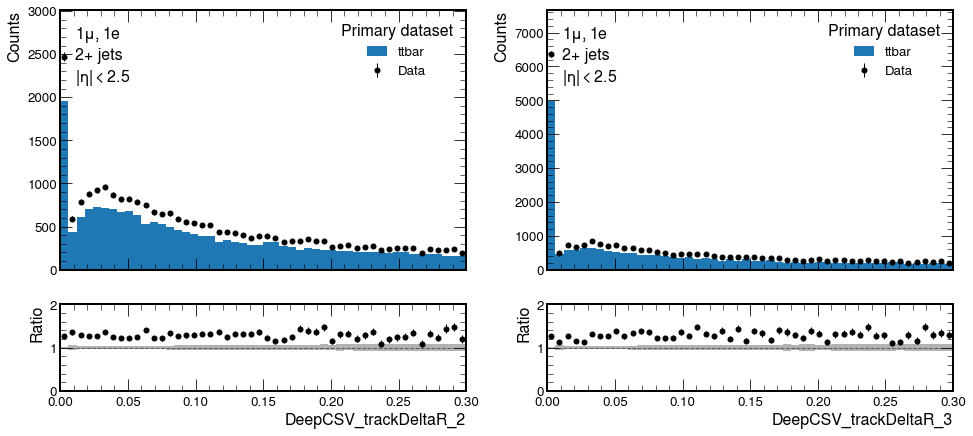

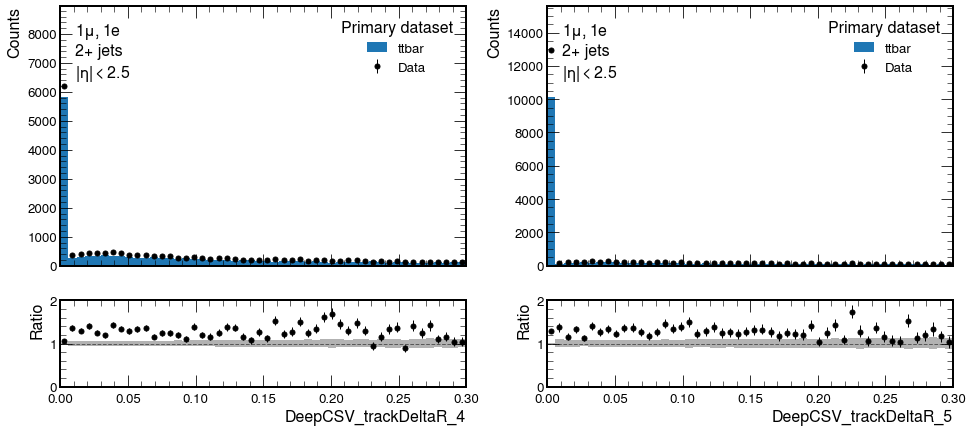

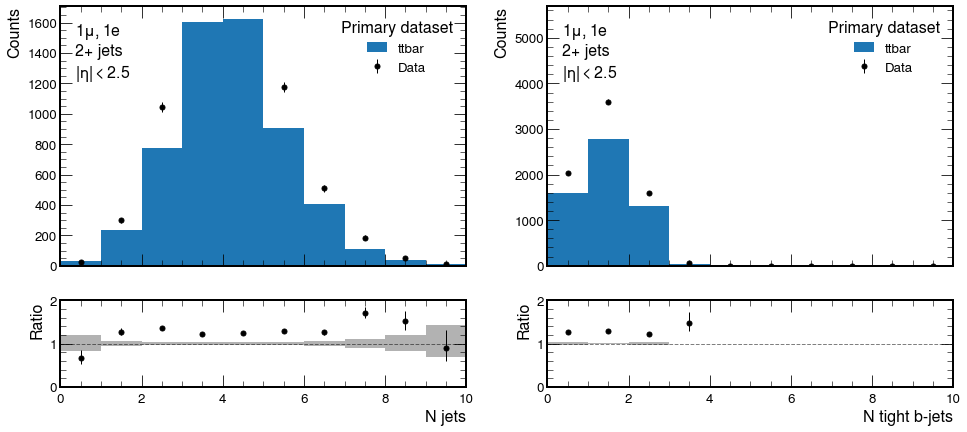

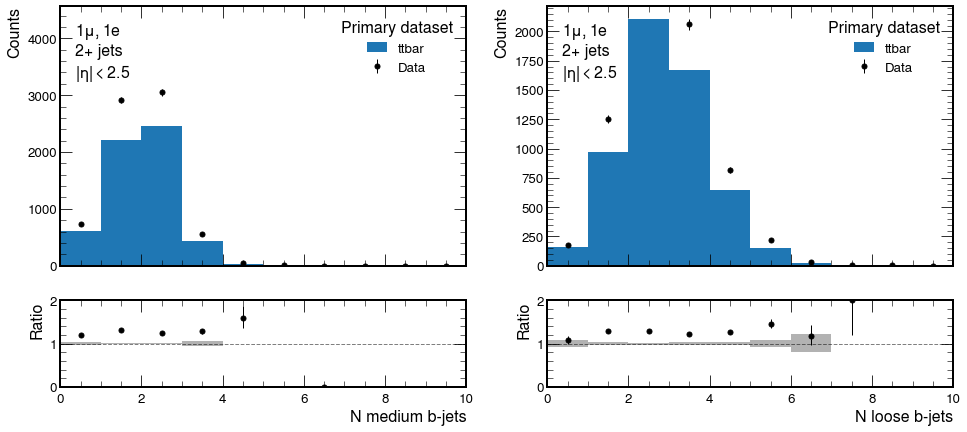

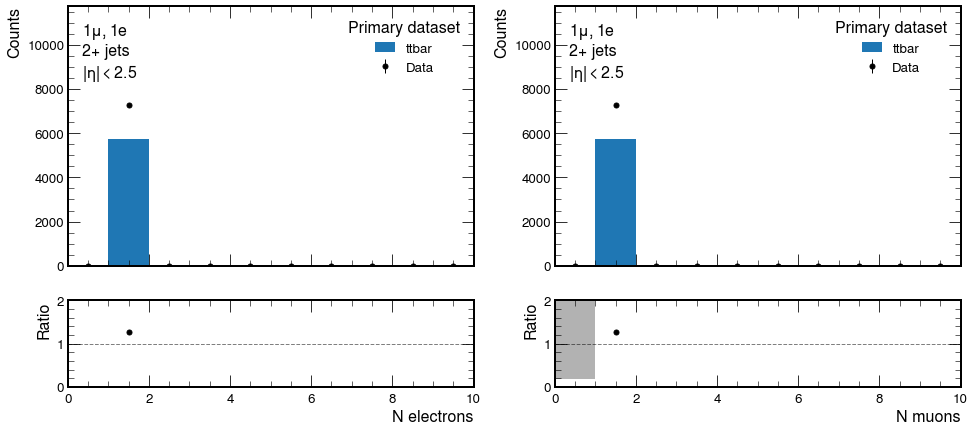

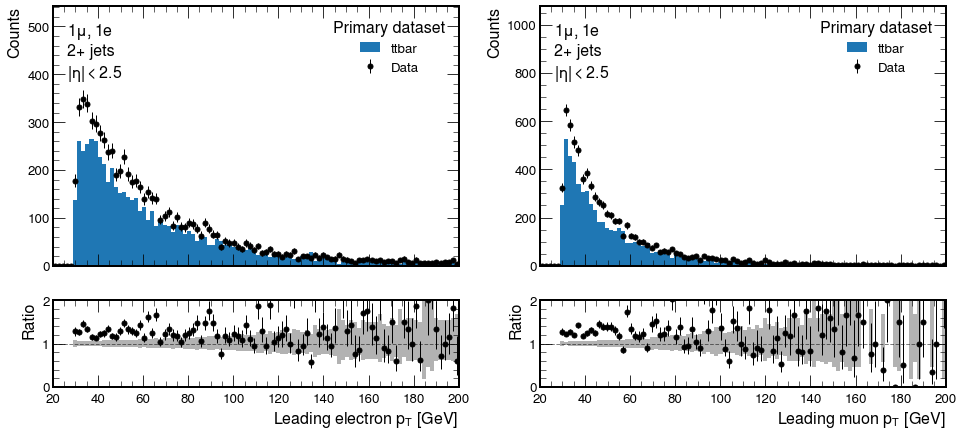

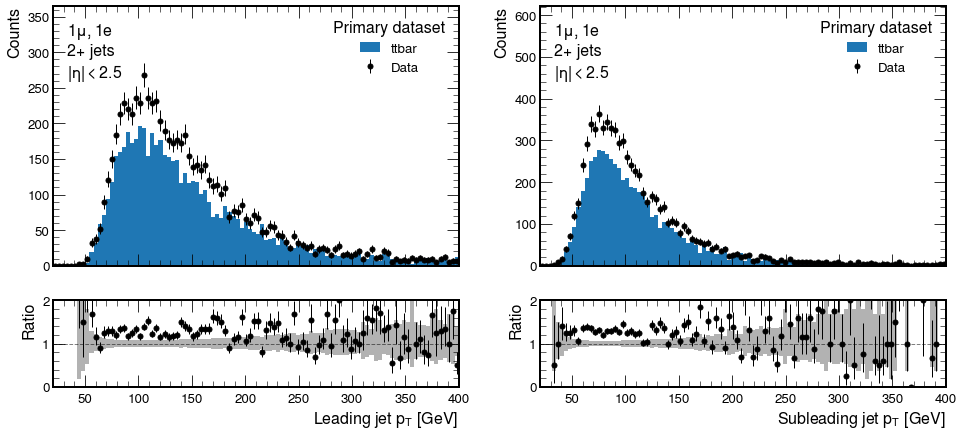

In [10]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
    fig, ((ax1, ax2), (rax1, rax2)) = plt.subplots(2, 2, figsize=(16, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    print(h1name, h2name)
    h1 = output[h1name]
    h2 = output[h2name]
    # if True: normalize histo to 1
    dense = False
    
    for ax, rax, h in zip([ax1, ax2], [rax1, rax2], [h1, h2]):
        # scale MC samples according to lumi (for now, dummy scale)
        scales = {
            'ttbar': 1.0,
        }
        h.scale(scales,axis='dataset')
        if hasattr(h, 'dim'):
            plot.plot1d(h["ttbar"], ax=ax, legend_opts={'loc':1}, density=dense, stack=True);
            plot.plot1d(h["Data"], ax=ax, legend_opts={'loc':1}, density=dense, error_opts=data_err_opts, clear=False);
            # now we build the ratio plot
            plot.plotratio(
                num=h['Data'].sum("dataset"),
                denom=h['ttbar'].sum("dataset"),
                ax=rax,
                error_opts=data_err_opts,
                denom_fill_opts={},
                guide_opts={},
                unc='num'
            )
            rax.set_ylabel('Ratio')
            rax.set_ylim(0,2)
            ax.set_xlabel(None)
        else:
            continue    
        #break
    for ax, hname in zip([ax1, ax2], [h1name, h2name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        ax.set_ylim(0.001, None)
        if hname.startswith("btag") or hname.startswith("DeepCSV_trackDecayLenVal"):
            ax.semilogy()
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)